<a href="https://colab.research.google.com/github/oaboelfetouh/Deep-Learning-Data/blob/main/ToDo_CP_Happy_house%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [2]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


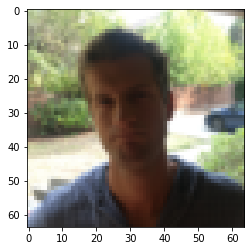

In [4]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [11]:
#create the model and add the layers [Dropout]

model = Sequential()

model.add(Conv2D(32, (3,3), padding = 'same' ,activation= 'relu', input_shape =(64,64,3)))
model.add(Conv2D(32, (3,3), activation = 'relu')) # we wont pad the images 
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25)) #0.25 to 0.50 works well

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.50)) #make it suffer to learn

model.add(Dense(1, activation = 'sigmoid'))


#print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)       

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [13]:
history_model = model.fit(X_train,Y_train, epochs = 5)

Epoch 1/5
19/19 [==============================] - 12s 568ms/step - loss: 0.7244 - accuracy: 0.5283
Epoch 2/5
19/19 [==============================] - 11s 563ms/step - loss: 0.6673 - accuracy: 0.6100
Epoch 3/5
19/19 [==============================] - 11s 565ms/step - loss: 0.5351 - accuracy: 0.7133
Epoch 4/5
19/19 [==============================] - 11s 567ms/step - loss: 0.4014 - accuracy: 0.8117
Epoch 5/5
19/19 [==============================] - 11s 570ms/step - loss: 0.3224 - accuracy: 0.8550


# Evaluate / Test

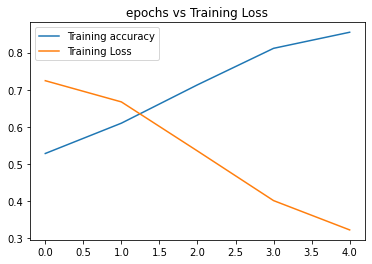

In [14]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [15]:
scores = model.evaluate(X_test, Y_test)
print('accuracy: ',scores[1])

5/5 [==============================] - 1s 133ms/step - loss: 0.3145 - accuracy: 0.8667
accuracy:  0.8666666746139526


Confusion Matrix

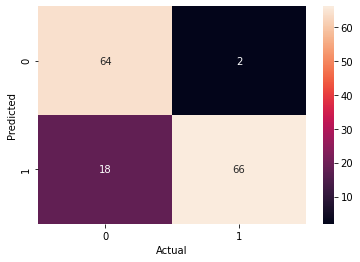

In [60]:
import numpy as np
import pandas as pd
Y_pred = model.predict(X_test)

listy= []
for i in range(len(Y_pred)):
  u = []
  x = int(round(Y_pred[i,0]))
  u.append(x)
  listy.append(u)
listy
y_pred = np.array(listy)

confusion_matrix = pd.crosstab(Y_test[:,0], y_pred[:,0], rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


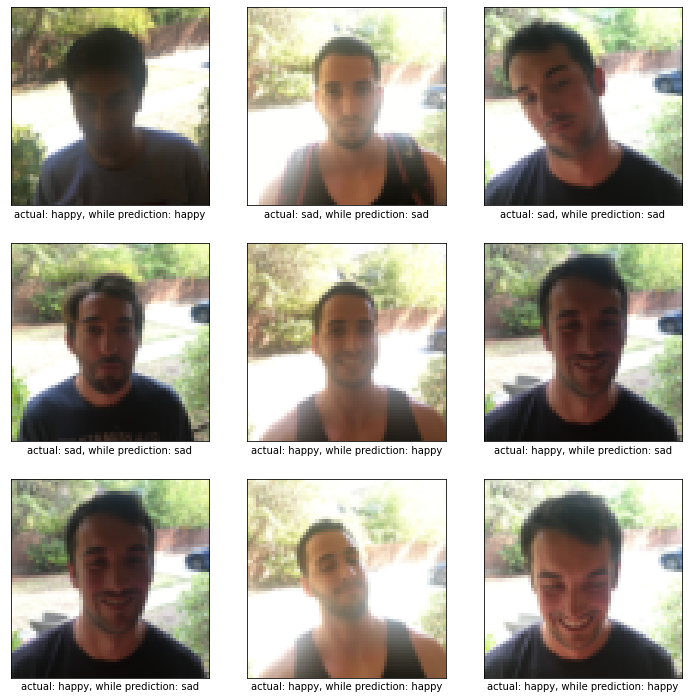

In [72]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 150)
    plt.imshow(X_test[img_index], cmap=plt.cm.gray)
    
    actual_label = int(Y_test[img_index])
    predicted_label = int(y_pred[img_index])
    text_labels = ['sad','happy']

    plt.xlabel(f'actual: {text_labels[actual_label]}, while prediction: {text_labels[predicted_label]}')
    
    
plt.tight_layout()
plt.show()
